In [1]:
import os
os.chdir(r'E:\Academic Projects\video games sales analysis')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
videogame_df = pd.read_csv('vgsales.csv')

In [4]:
videogame_df.shape

(16598, 11)

In [5]:
videogame_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [6]:
videogame_df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [7]:
videogame_df["Year"] = videogame_df["Year"].fillna(videogame_df["Year"].mean())

In [8]:
videogame_df = videogame_df.dropna(axis = 0)

In [9]:
videogame_df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [10]:
print('''Q1. How many games are sold between 2001 and 2010 in millinons of all countries adn globally''')
print('''Calculating counntry and global sales b/w 2001 and 2010''')

Q1. How many games are sold between 2001 and 2010 in millinons of all countries adn globally
Calculating counntry and global sales b/w 2001 and 2010


In [11]:
year_count = [i for i in range(2001, 2011)]
count_in_range = videogame_df.loc[videogame_df['Year'].isin(year_count)]

In [12]:
count_in_range

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [13]:
ns = sum(count_in_range.NA_Sales)
es = sum(count_in_range.EU_Sales)
js = sum(count_in_range.JP_Sales)
os = sum(count_in_range.Other_Sales)
gs = sum(count_in_range.Global_Sales)
#print(ns, es, js, os, gs)

print('Total sales in North America from 2001 to 2010: ', round(ns), "Millions\n")
print('Total sales in Europe from 2001 to 2010: ', round(es), "Millions\n")
print('Total sales in Japan from 2001 to 2010: ', round(js), "Millions\n")
print('Total sales in Other countries from 2001 to 2010: ', round(os), "Millions\n")
print('Total sales in Global from 2001 to 2010: ', round(gs), "Millions\n")

Total sales in North America from 2001 to 2010:  2613 Millions

Total sales in Europe from 2001 to 2010:  1378 Millions

Total sales in Japan from 2001 to 2010:  527 Millions

Total sales in Other countries from 2001 to 2010:  513 Millions

Total sales in Global from 2001 to 2010:  5035 Millions



In [14]:
print("Q2. top publishers and platform prefered(sorted)")

topPlatform = videogame_df.Platform.value_counts().head(10)
topPublisher = videogame_df.Publisher.value_counts().head(10)

Q2. top publishers and platform prefered(sorted)


In [15]:
pd.DataFrame(topPlatform)

,count
Platform,
PS2,2159
DS,2156
PS3,1326
Wii,1324
X360,1261
PSP,1211
PS,1193
PC,954
XB,824


In [16]:
pd.DataFrame(topPublisher)

,count
Publisher,
Electronic Arts,1351
Activision,975
Namco Bandai Games,932
Ubisoft,921
Konami Digital Entertainment,832
THQ,715
Nintendo,703
Sony Computer Entertainment,683
Sega,639


In [17]:
print("Q3. mean, minimum and maximum of games based on publisher for global sales")

agg_result = videogame_df.groupby("Publisher").agg({"Global_Sales" : ["mean", "min", "max"]})

Q3. mean, minimum and maximum of games based on publisher for global sales


In [18]:
agg_result

Global_Sales            
                                     mean   min   max
Publisher                                            
10TACLE Studios                  0.036667  0.02  0.06
1C Company                       0.033333  0.01  0.05
20th Century Fox Video Games     0.388000  0.22  0.79
2D Boy                           0.040000  0.04  0.04
3DO                              0.281111  0.01  1.28
...                                   ...   ...   ...
id Software                      0.030000  0.03  0.03
imageepoch Inc.                  0.020000  0.01  0.03
inXile Entertainment             0.100000  0.10  0.10
mixi, Inc                        0.860000  0.86  0.86
responDESIGN                     0.065000  0.04  0.09

[578 rows x 3 columns]

In [19]:
print("Q4. popular genre in North America")

videogame_df["Genre"].unique()

Q4. popular genre in North America


array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [20]:
topNAgames = videogame_df.sort_values("NA_Sales", ascending = False)
topNAgames

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
...,...,...,...,...,...,...,...,...,...,...,...
13576,13578,Kanuchi: Shiroki Tsubasa no Shou,PS2,2008.0,Adventure,Idea Factory,0.00,0.00,0.04,0.00,0.04
13577,13579,Summer Athletics 2009,X360,2009.0,Sports,49Games,0.00,0.04,0.00,0.00,0.04
10118,10120,Pro Yaky? Spirits 5,PS3,2008.0,Sports,Konami Digital Entertainment,0.00,0.00,0.11,0.00,0.11
13579,13581,Katekyoo Hitman Reborn! Battle Arena,PSP,2008.0,Fighting,Marvelous Interactive,0.00,0.00,0.04,0.00,0.04


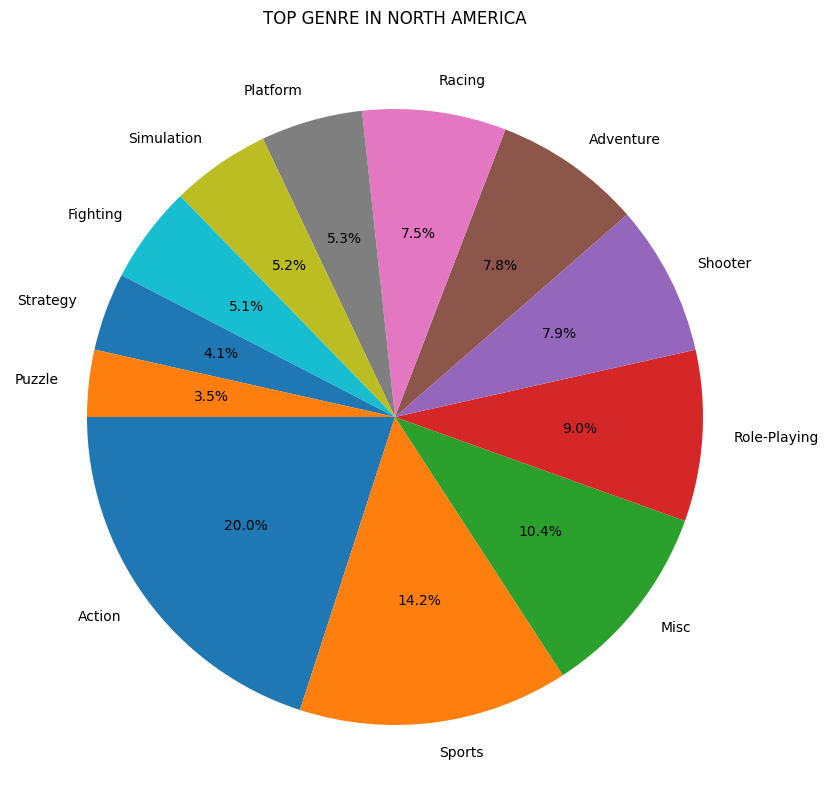

In [21]:
topNAgenre = topNAgames.Genre.value_counts()
plt.figure(figsize = (10, 10))
plt.title("TOP GENRE IN NORTH AMERICA")
plt.pie(topNAgenre, labels = topNAgenre.index, autopct = '%1.1f%%', startangle = 180)
plt.show()

In [22]:
print("Q5. top publisher in Japan")

topPublisher = videogame_df.groupby("Publisher").sum()
topPublisher_jp = topPublisher.sort_values("JP_Sales", ascending = False)
topPublisher_jp

Q5. top publisher in Japan


,Rank,Name,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Publisher,,,,,,,,,,
Nintendo,2714164,Wii SportsSuper Mario Bros.Mario Kart WiiWii S...,WiiNESWiiWiiGBGBDSWiiWiiNESDSDSGBWiiWiiSNESDSD...,1.408711e+06,SportsPlatformRacingSportsRole-PlayingPuzzlePl...,816.87,418.74,455.42,95.33,1786.56
Namco Bandai Games,8741157,Namco MuseumTekken Tag TournamentNamco Museum:...,GBAPS2PS2PS2PS4PS2NESPS3NESPS3PSPS2PS3PS2PS2Wi...,1.871696e+06,MiscFightingMiscFightingRole-PlayingFightingSp...,69.52,42.63,127.07,14.69,254.09
Konami Digital Entertainment,7331538,Metal Gear Solid 2: Sons of LibertyMetal Gear ...,PS2PS3PSPS2PS2PS2PS2PS2PS4PS2PS2WiiPS2PS3GBAPS...,1.668450e+06,ActionActionActionSportsActionSportsSportsSpor...,92.16,69.69,91.30,30.31,283.64
Sony Computer Entertainment,4105604,Gran Turismo 3: A-SpecGran Turismo 4Gran Turis...,PS2PS2PSPS3PSPSPS2PSPSPSPS3PSPS3PS2PS3PSPS3PSP...,1.369040e+06,RacingRacingRacingRacingRole-PlayingRacingRole...,265.22,187.72,74.10,80.45,607.50
Capcom,2978814,Street Fighter II: The World WarriorMonster Hu...,SNESPSPPS3PSPPS3SNESPS2X3603DS3DSPS3PS2X360PSP...,7.643250e+05,FightingRole-PlayingActionRole-PlayingFighting...,78.59,39.22,68.08,14.84,200.89
...,...,...,...,...,...,...,...,...,...,...
Jester Interactive,21837,Super Trucks RacingSuzuki TT SuperbikesFunkMas...,PS2PS2PS2,6.010000e+03,RacingRacingMisc,0.70,0.29,0.00,0.14,1.15
Jack of All Games,35465,The Cat in the HatVeggy WorldHoppie,GBADSDS,6.027000e+03,PlatformShooterPlatform,0.31,0.10,0.00,0.01,0.42
Ivolgamus,13998,Fading Shadows,PSP,2.008000e+03,Puzzle,0.03,0.00,0.00,0.00,0.04


Q6. popularity of Racing games


<Axes: xlabel='Year', ylabel='Global_Sales'>

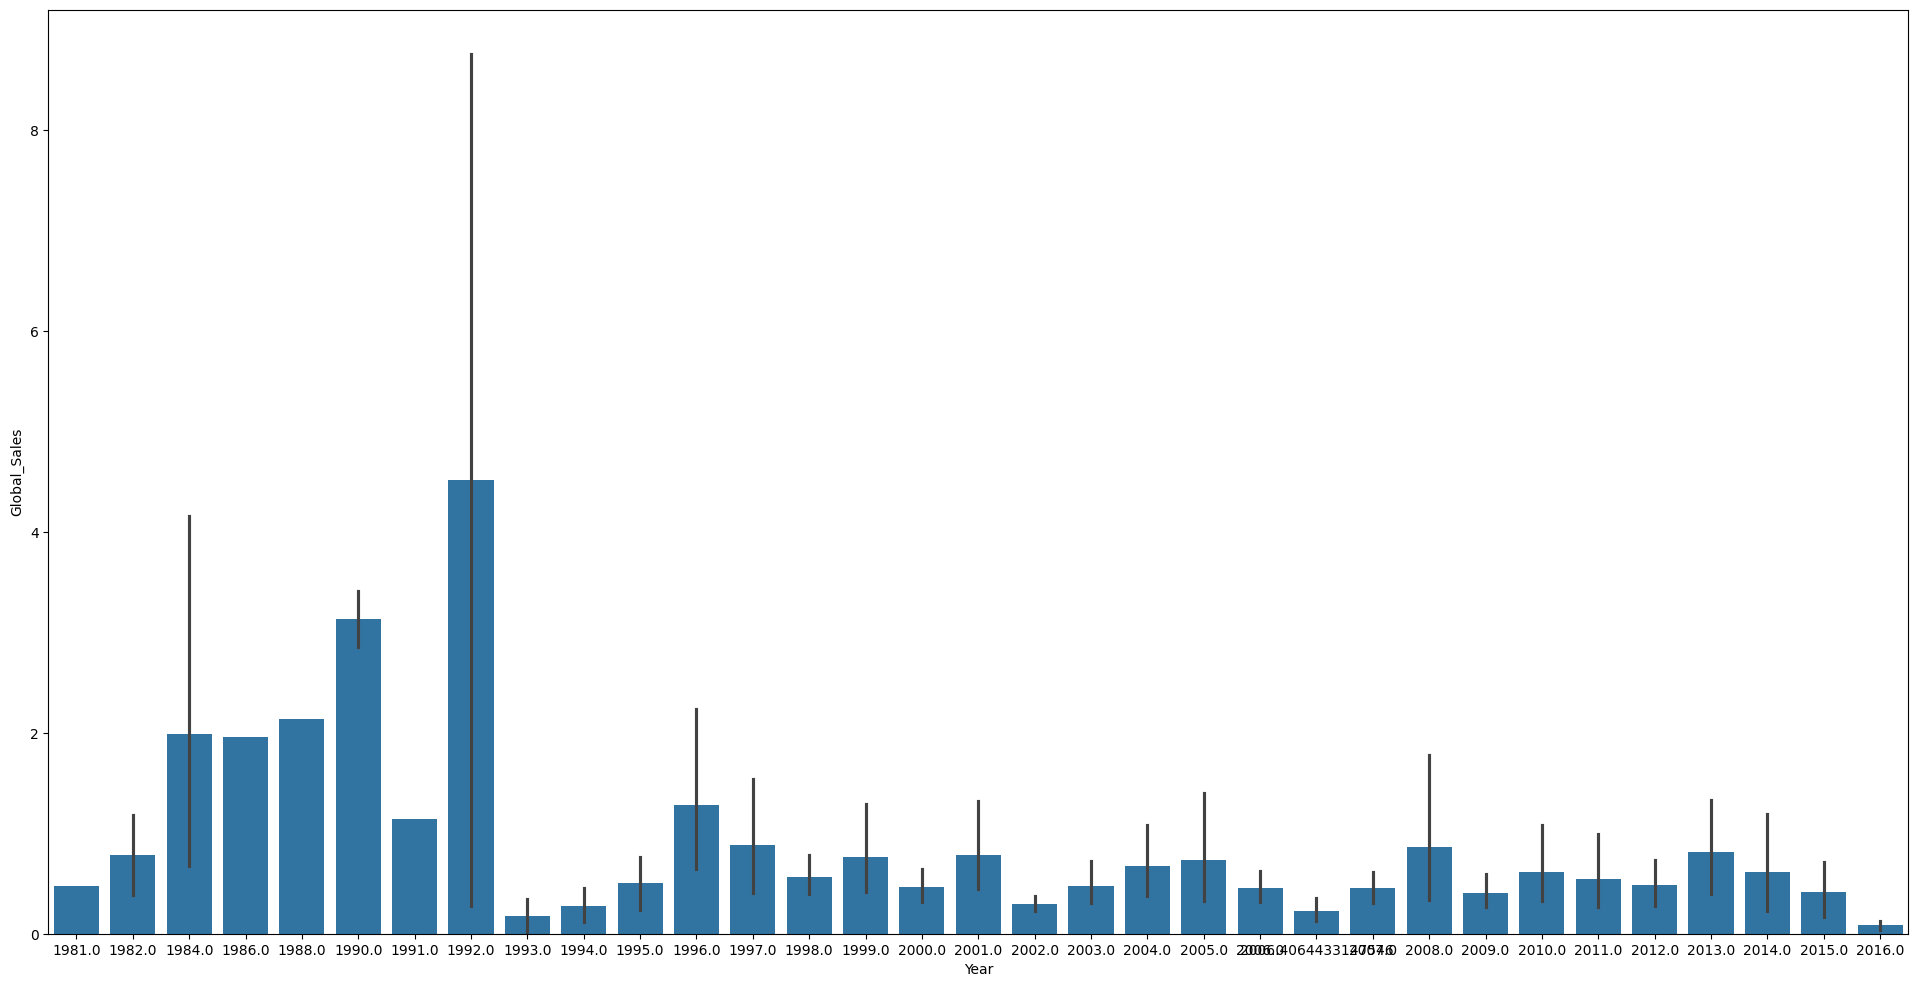

In [23]:
print("Q6. popularity of Racing games")

plt.figure(figsize = (24, 12))
rcList = videogame_df.loc[videogame_df["Genre"] == "Racing"]
sns.barplot(data = rcList, x = "Year", y = "Global_Sales")

<Axes: xlabel='Year', ylabel='Global_Sales'>

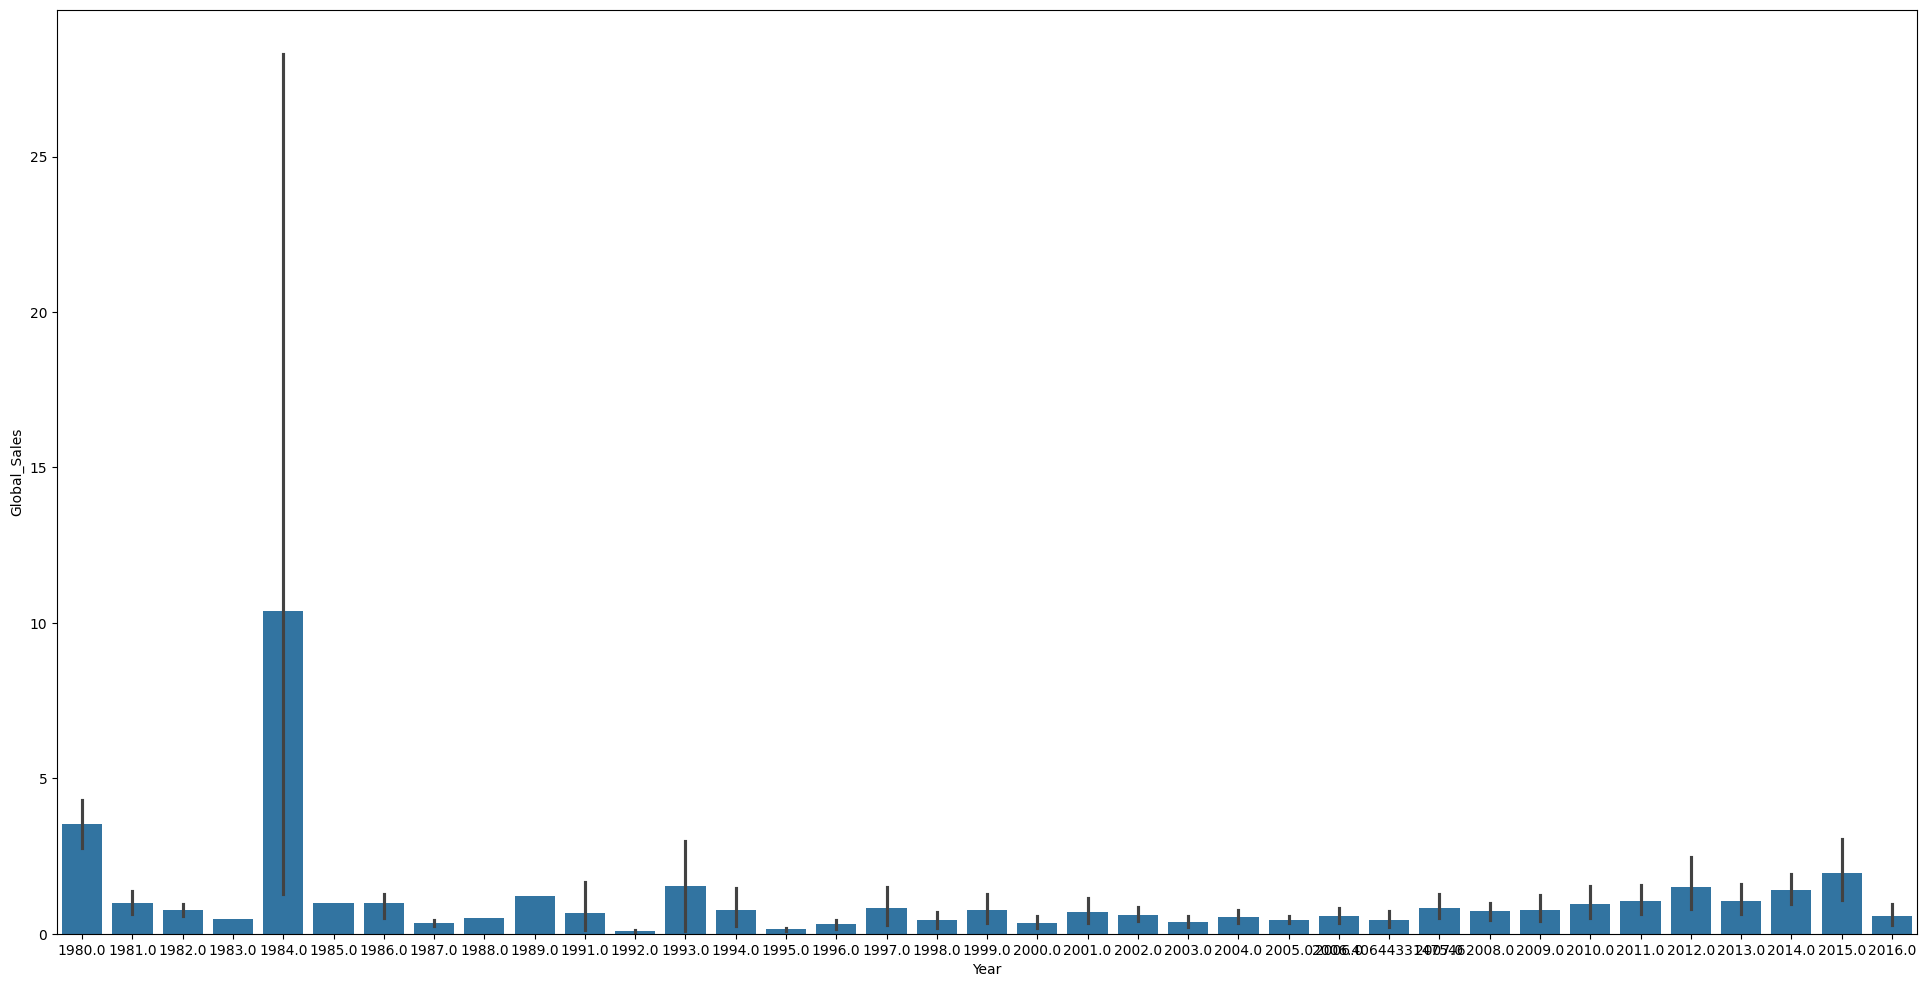

In [24]:
plt.figure(figsize = (24, 12))
shList = videogame_df.loc[videogame_df["Genre"] == "Shooter"]
sns.barplot(data = shList, x = "Year", y = "Global_Sales")

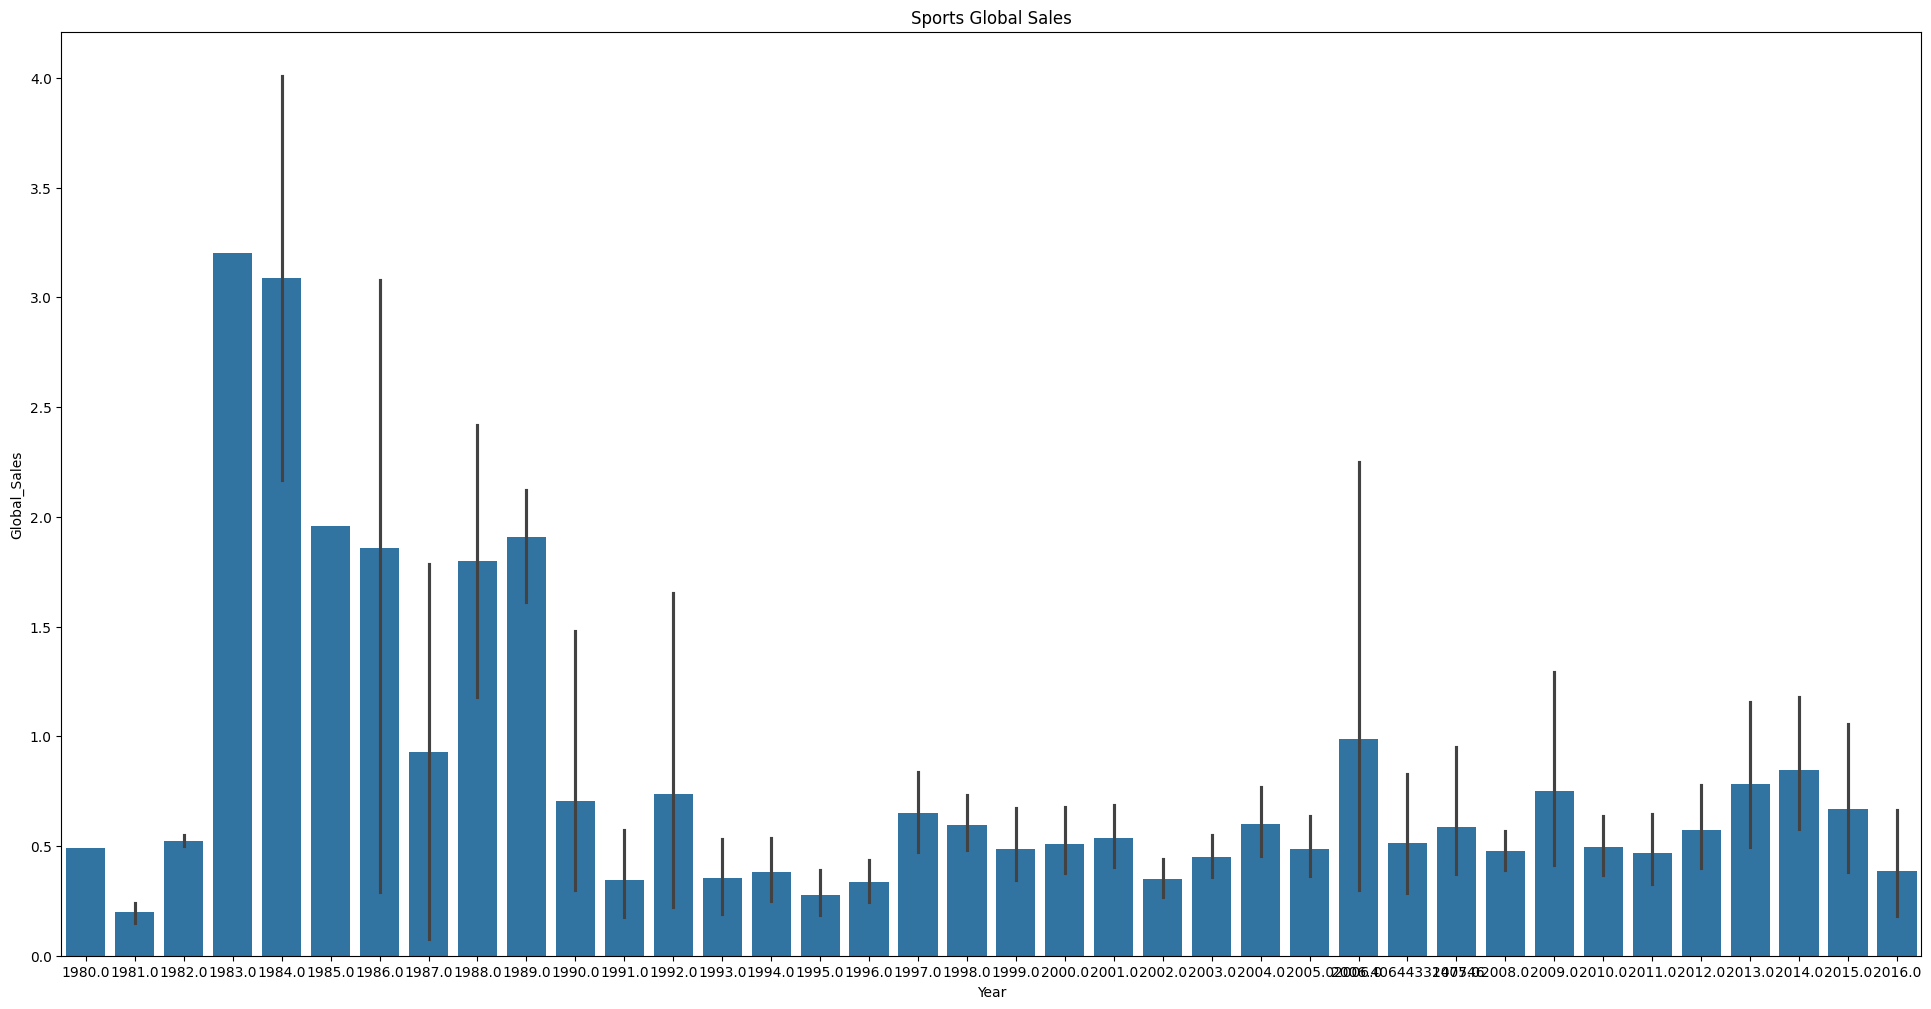

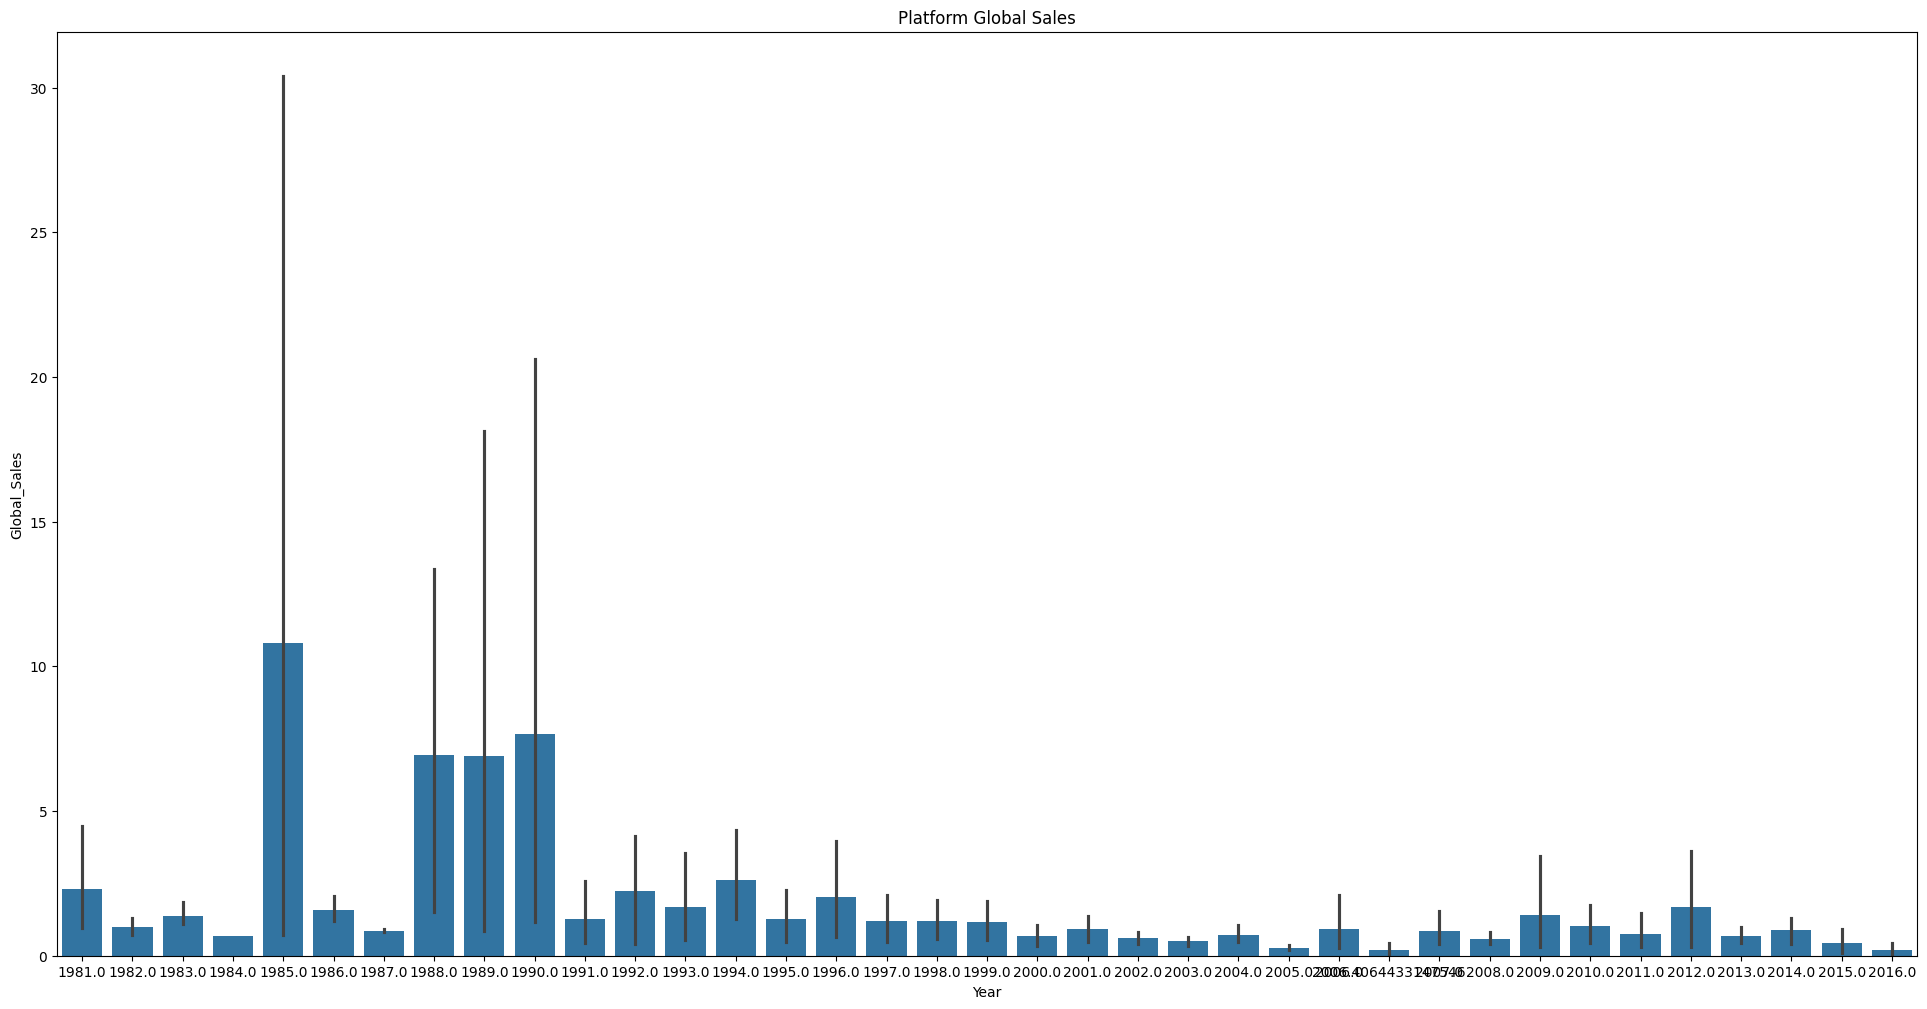

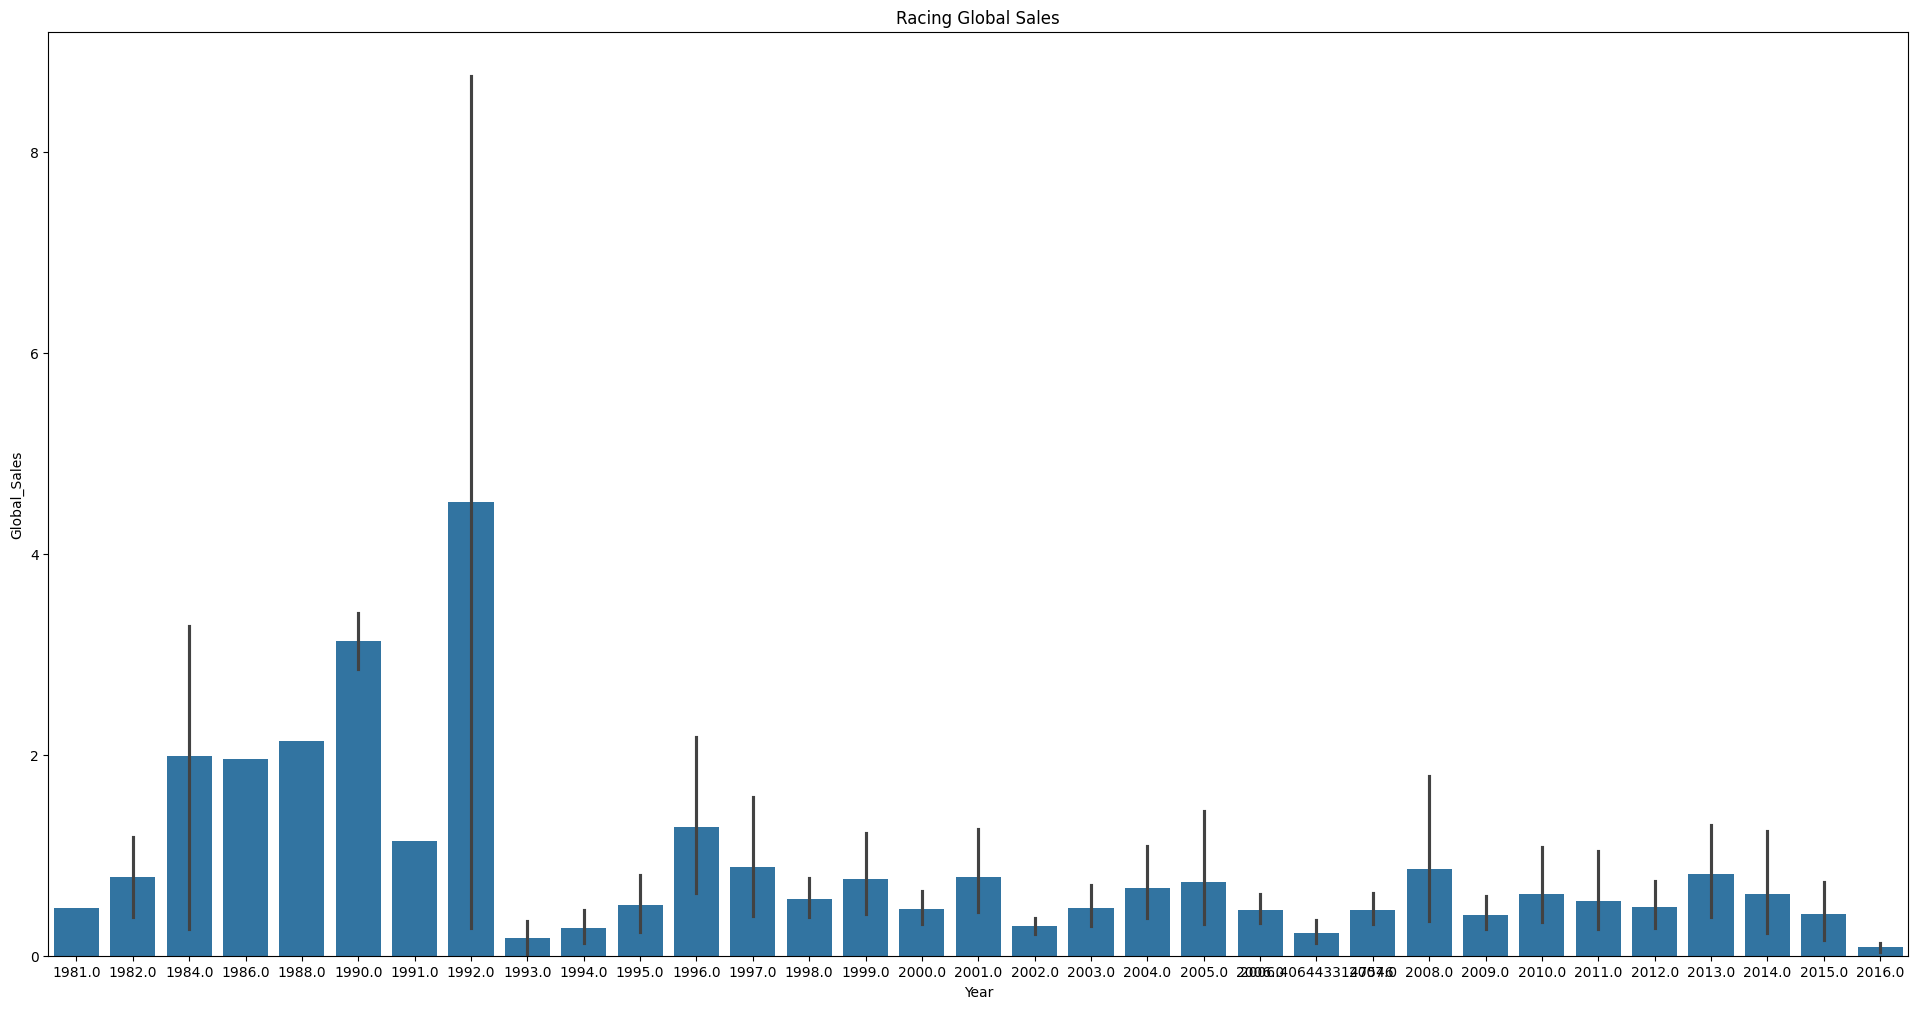

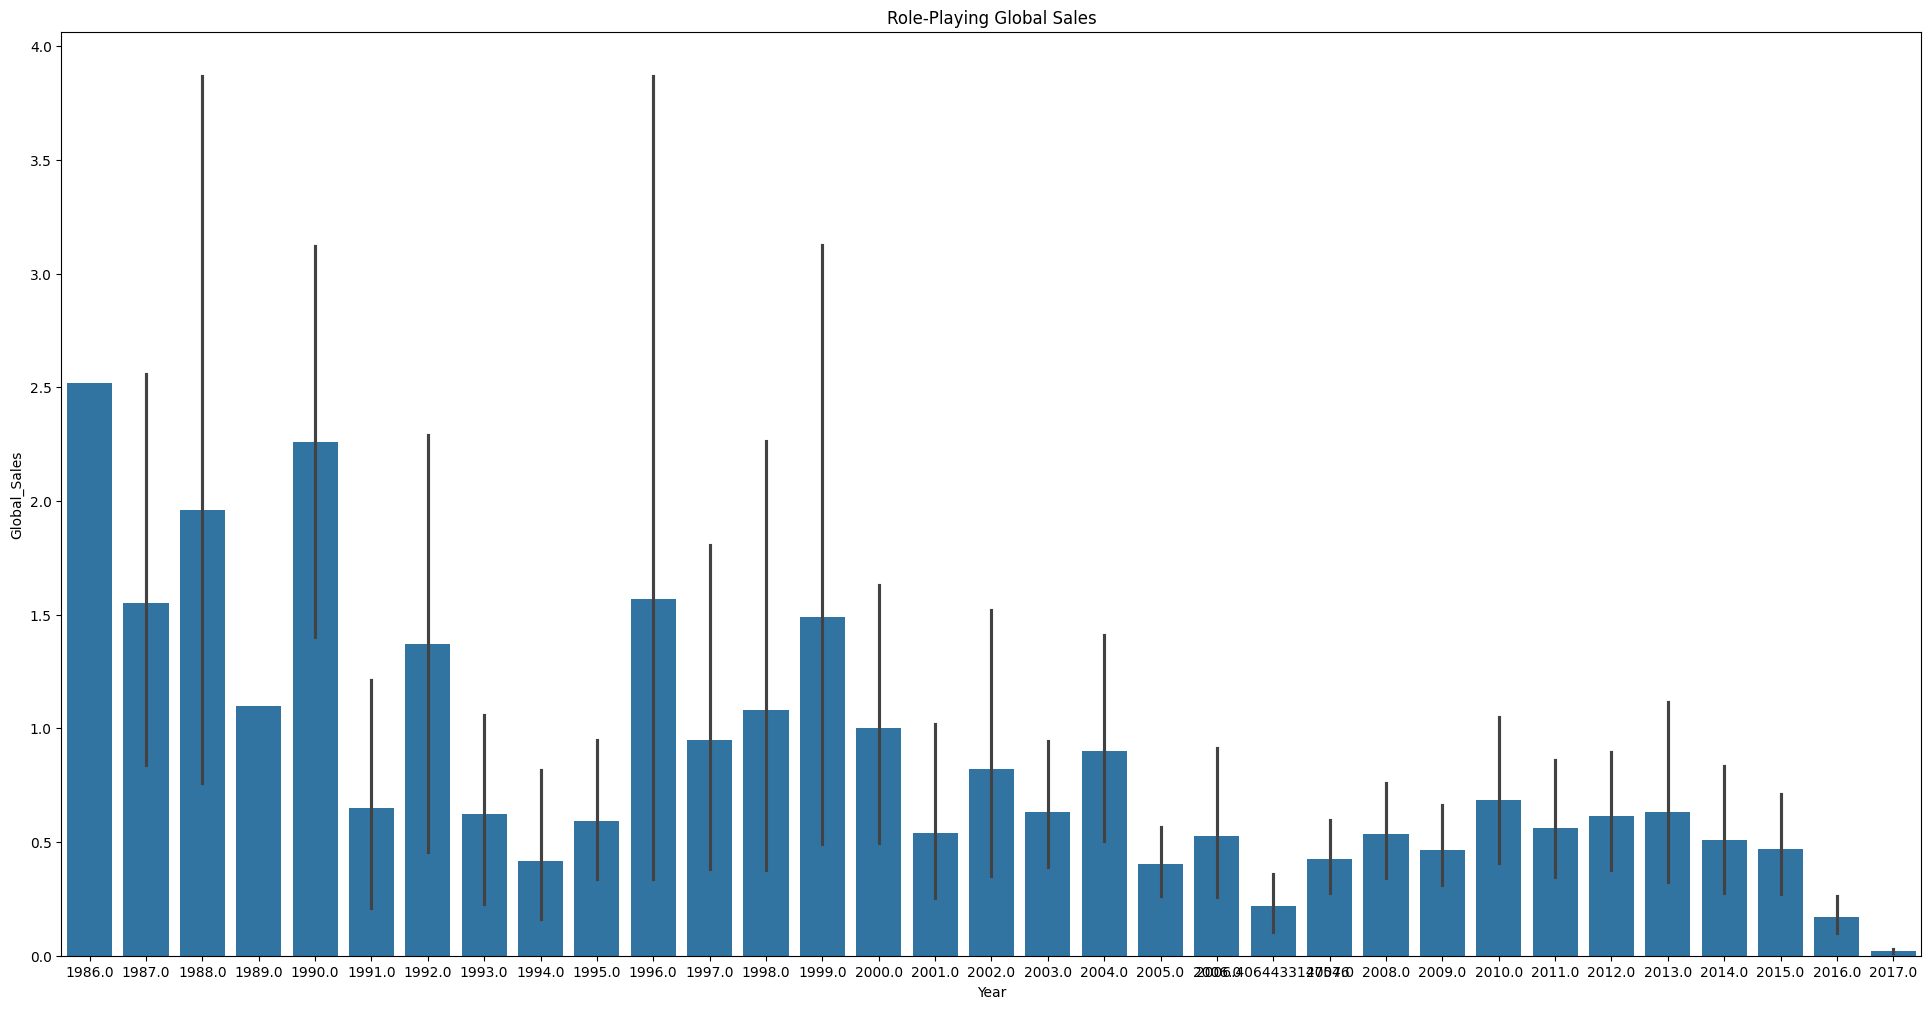

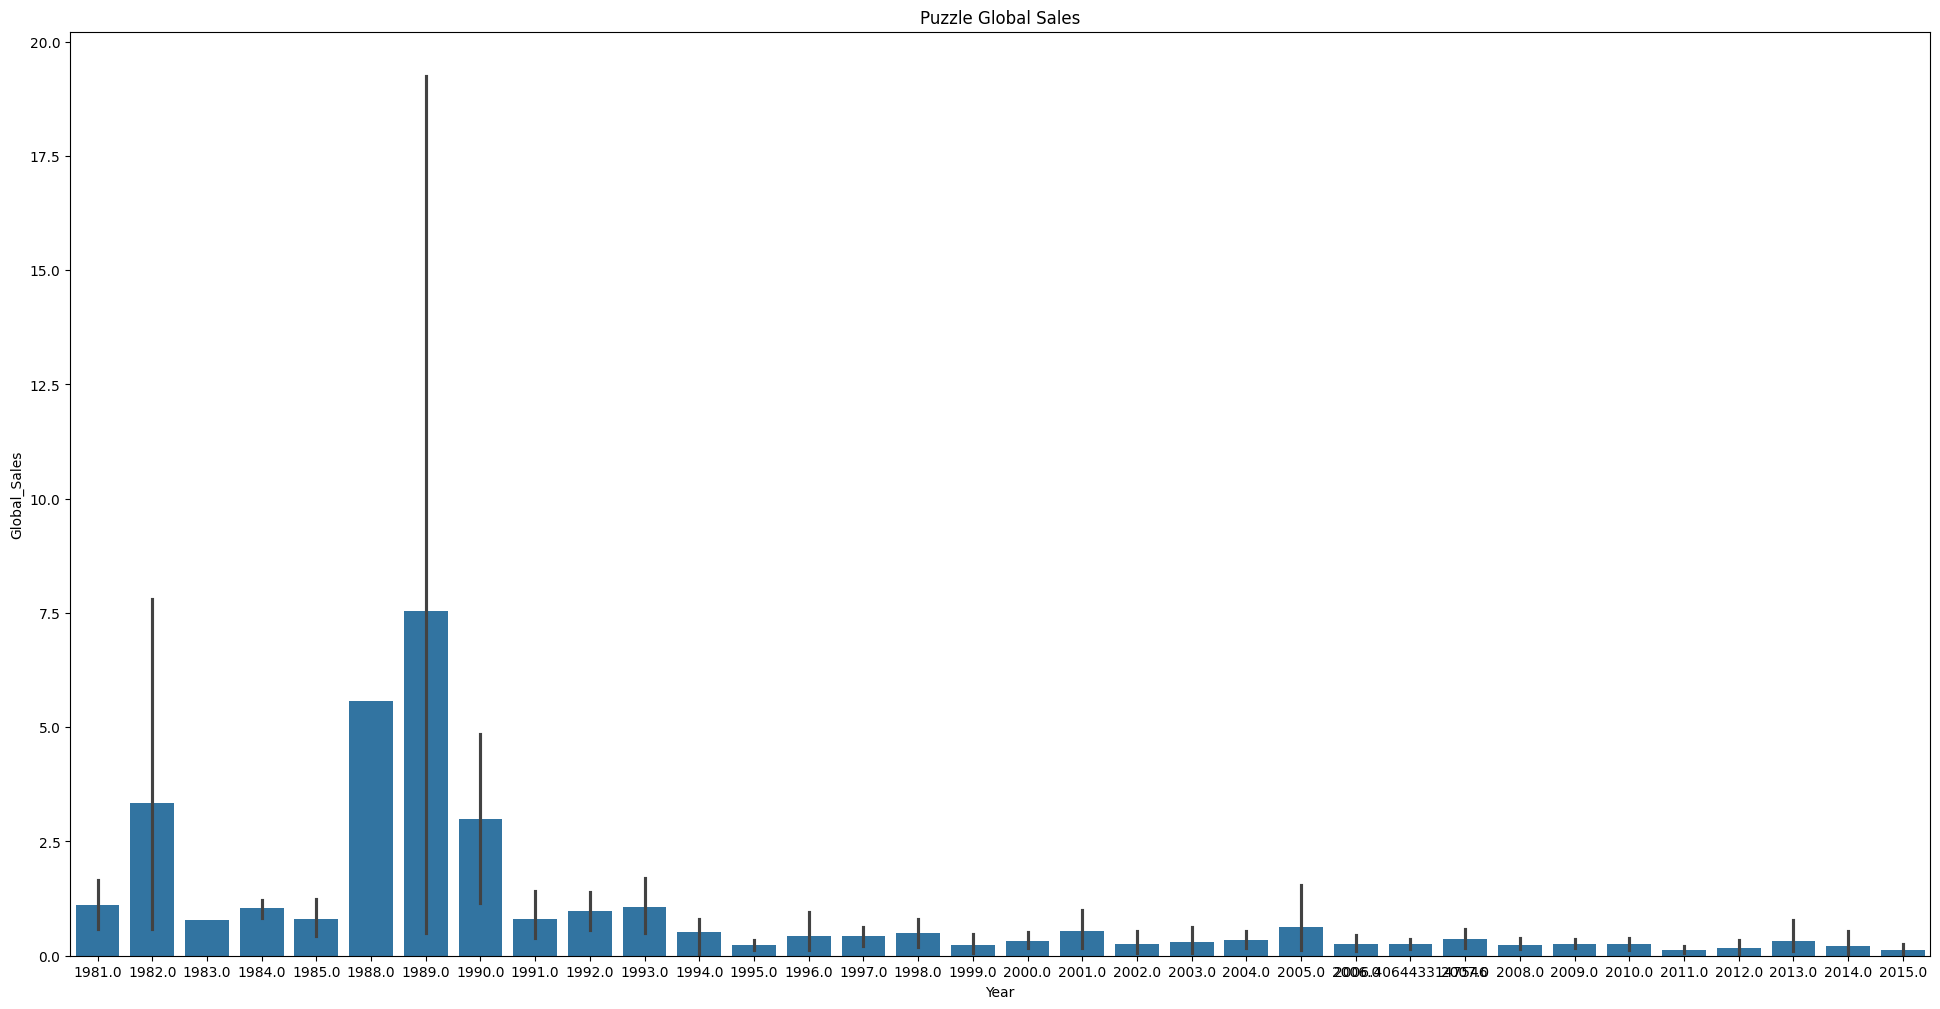

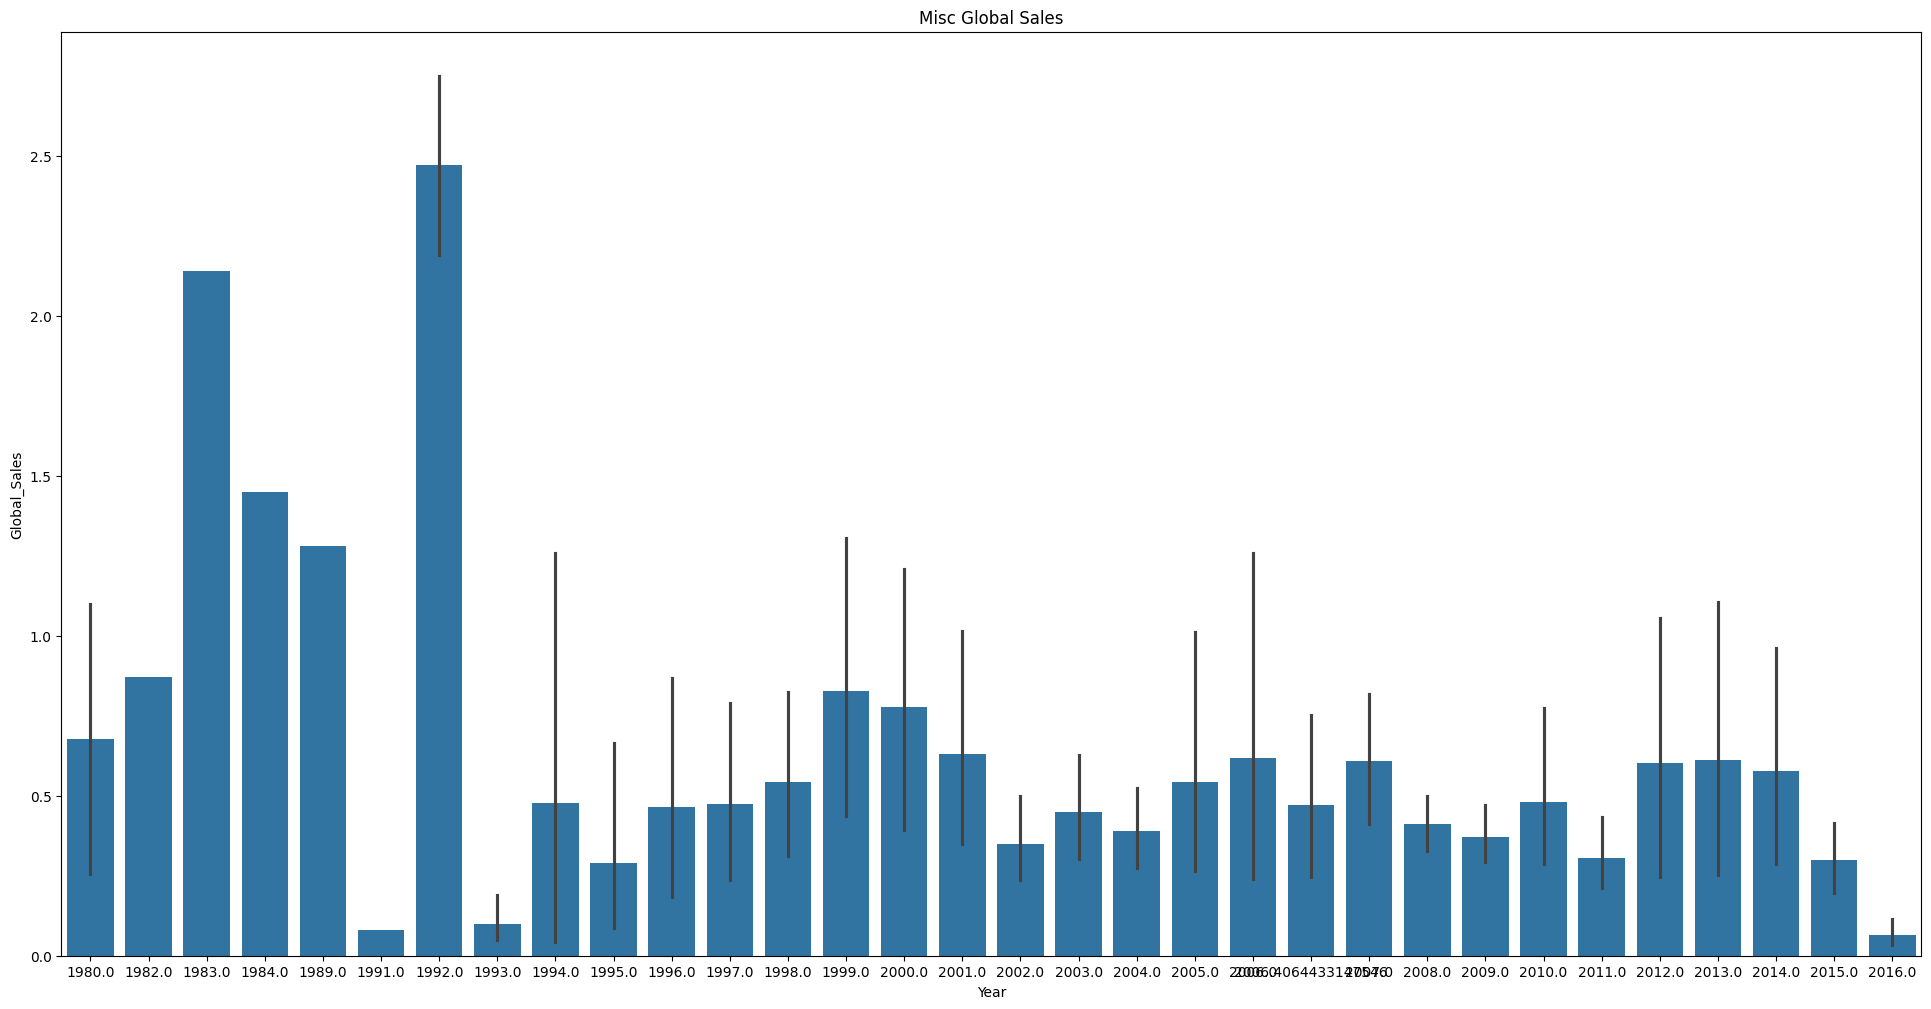

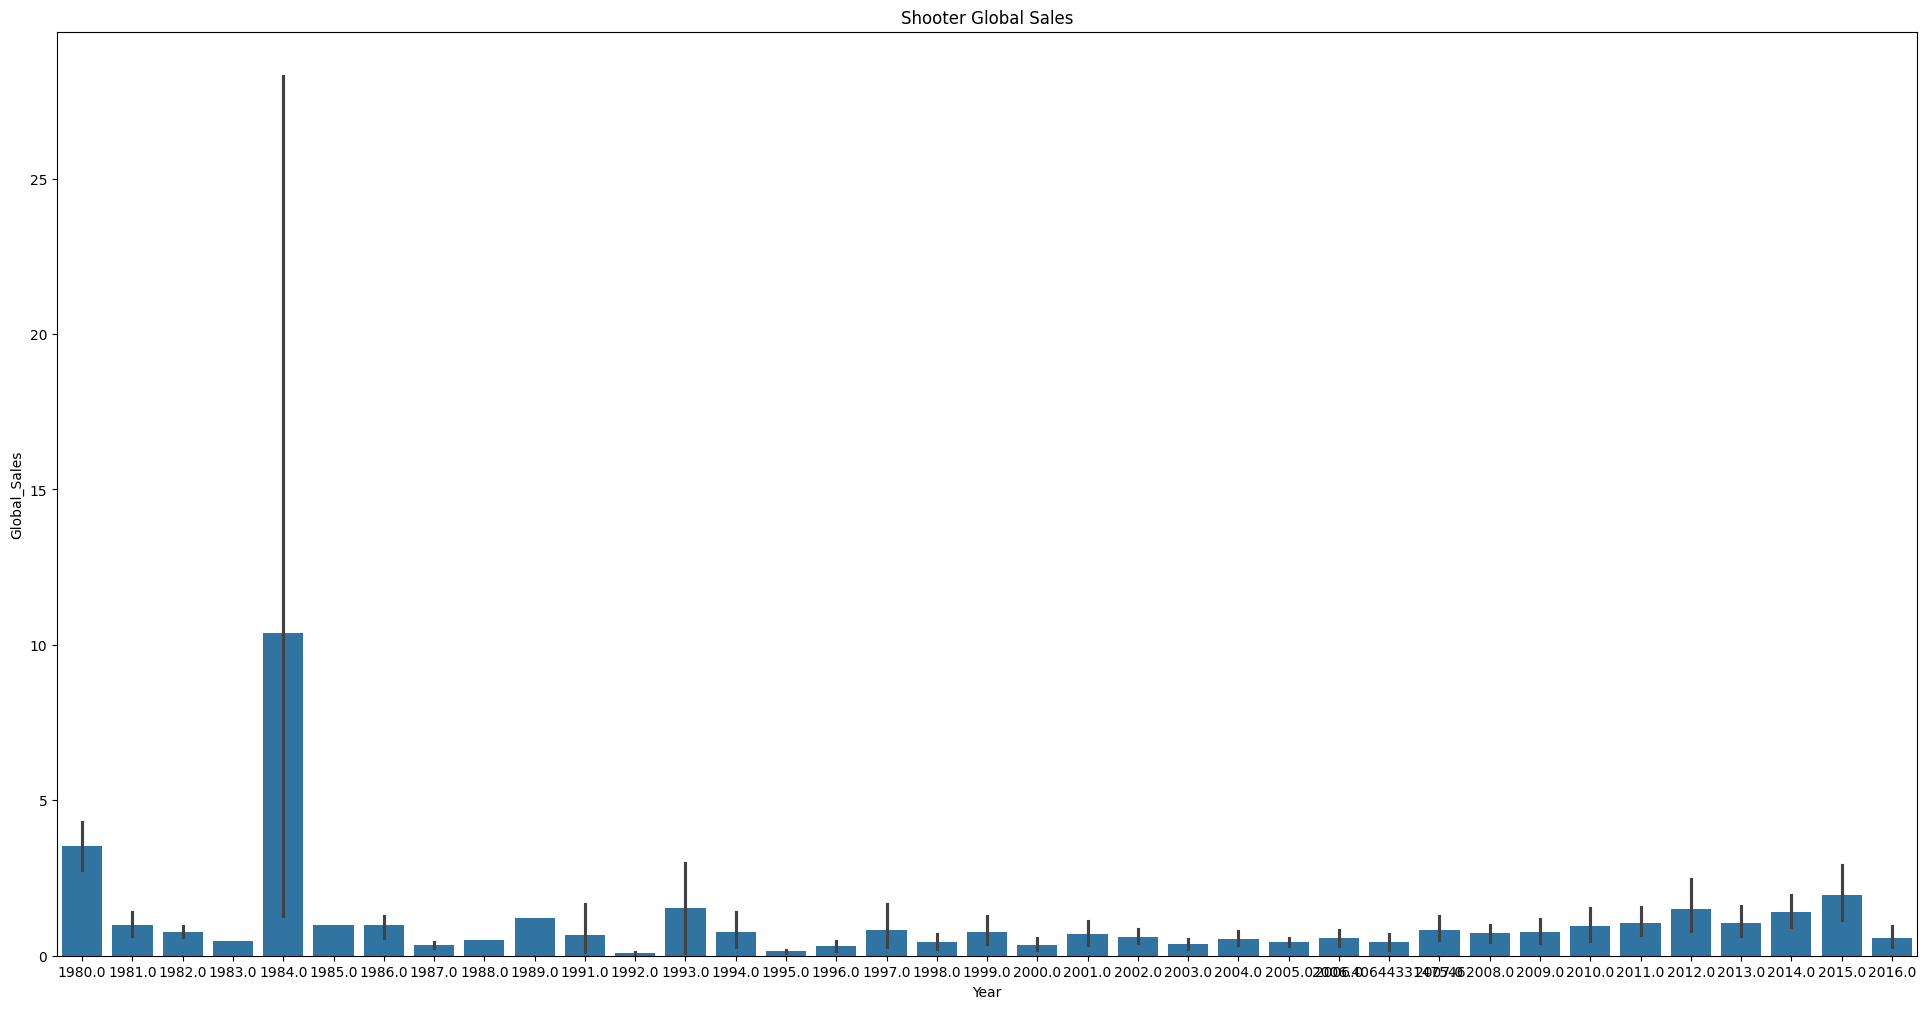

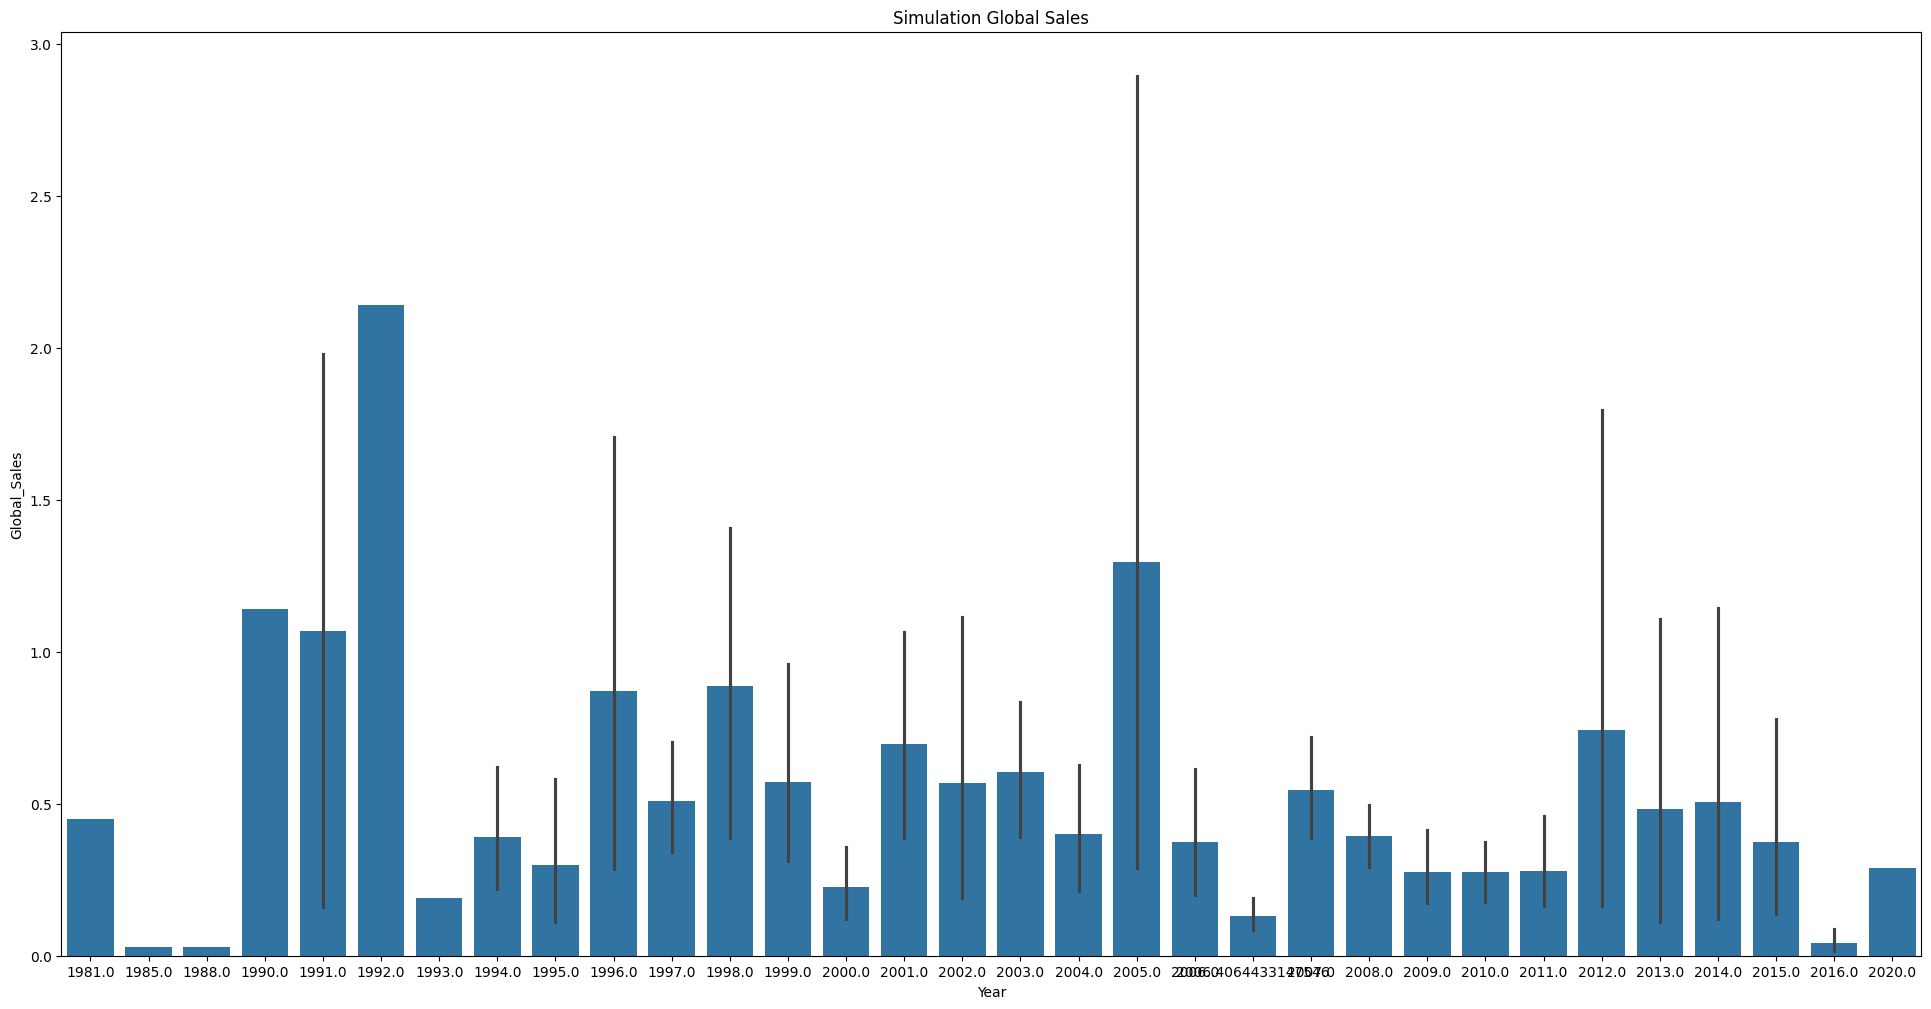

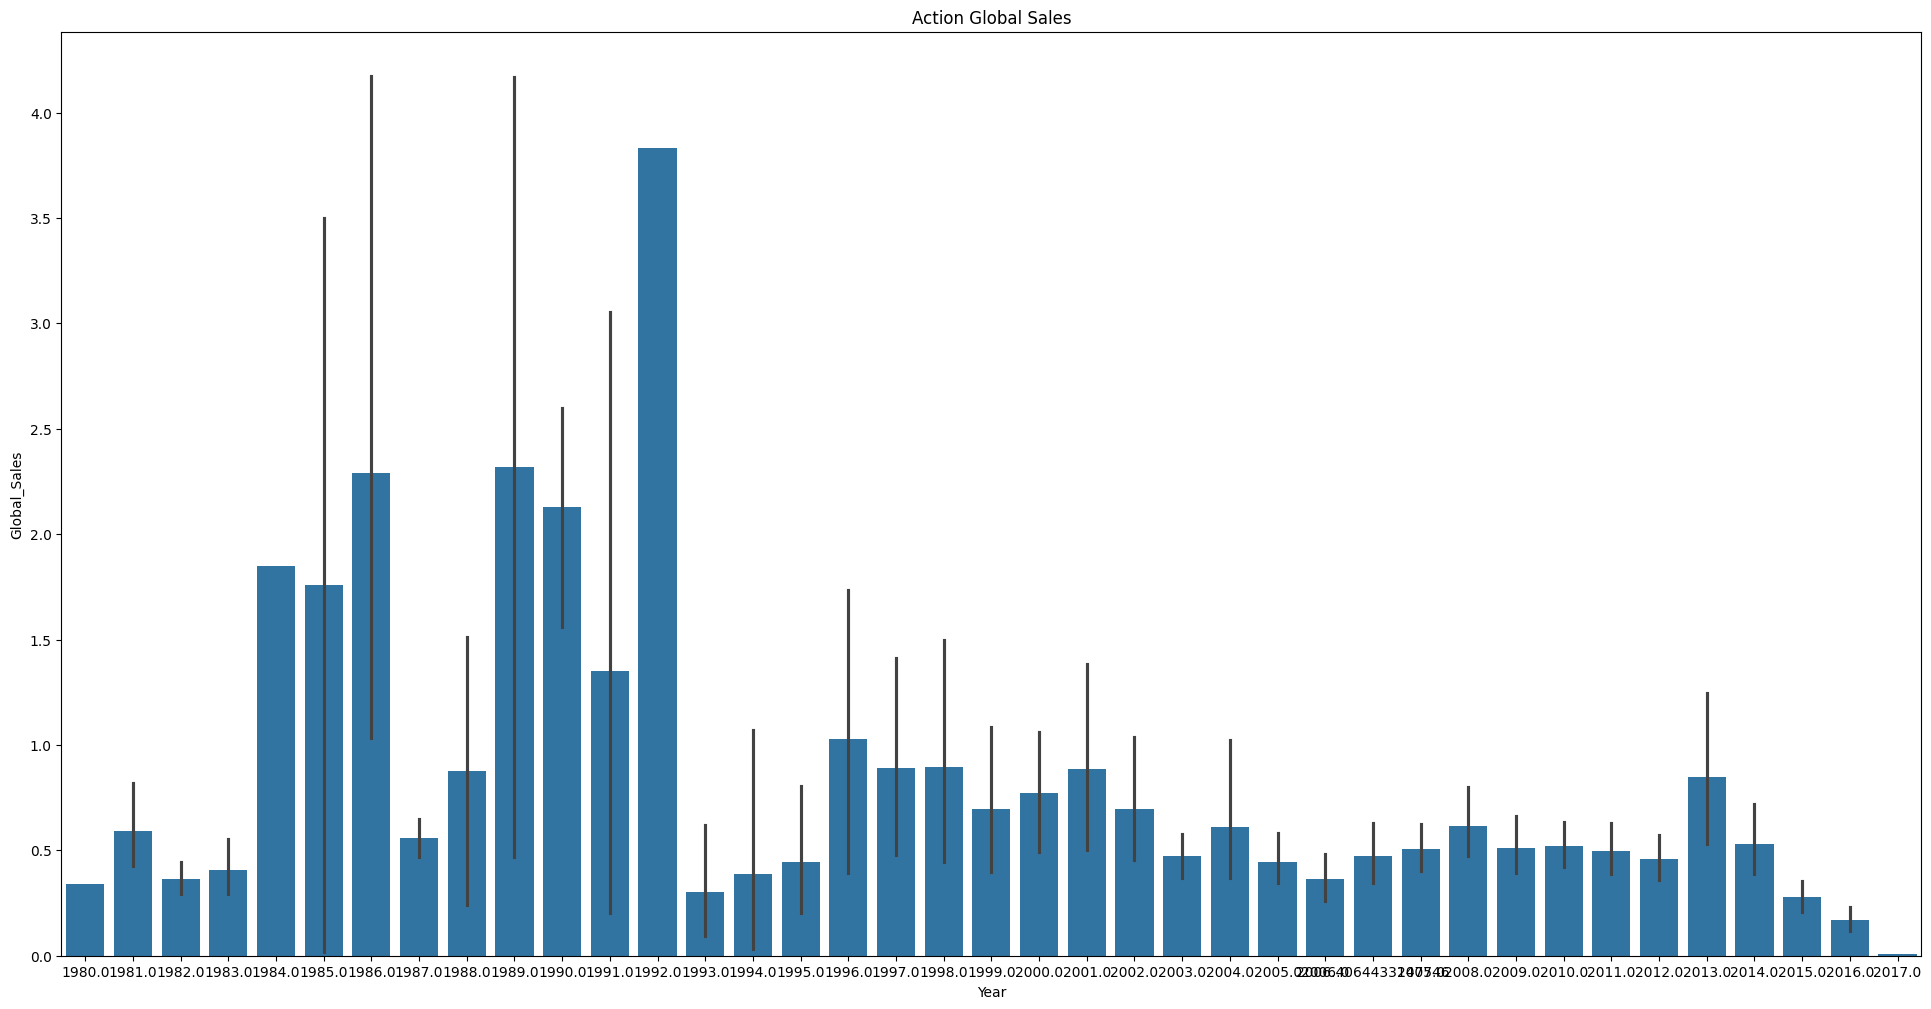

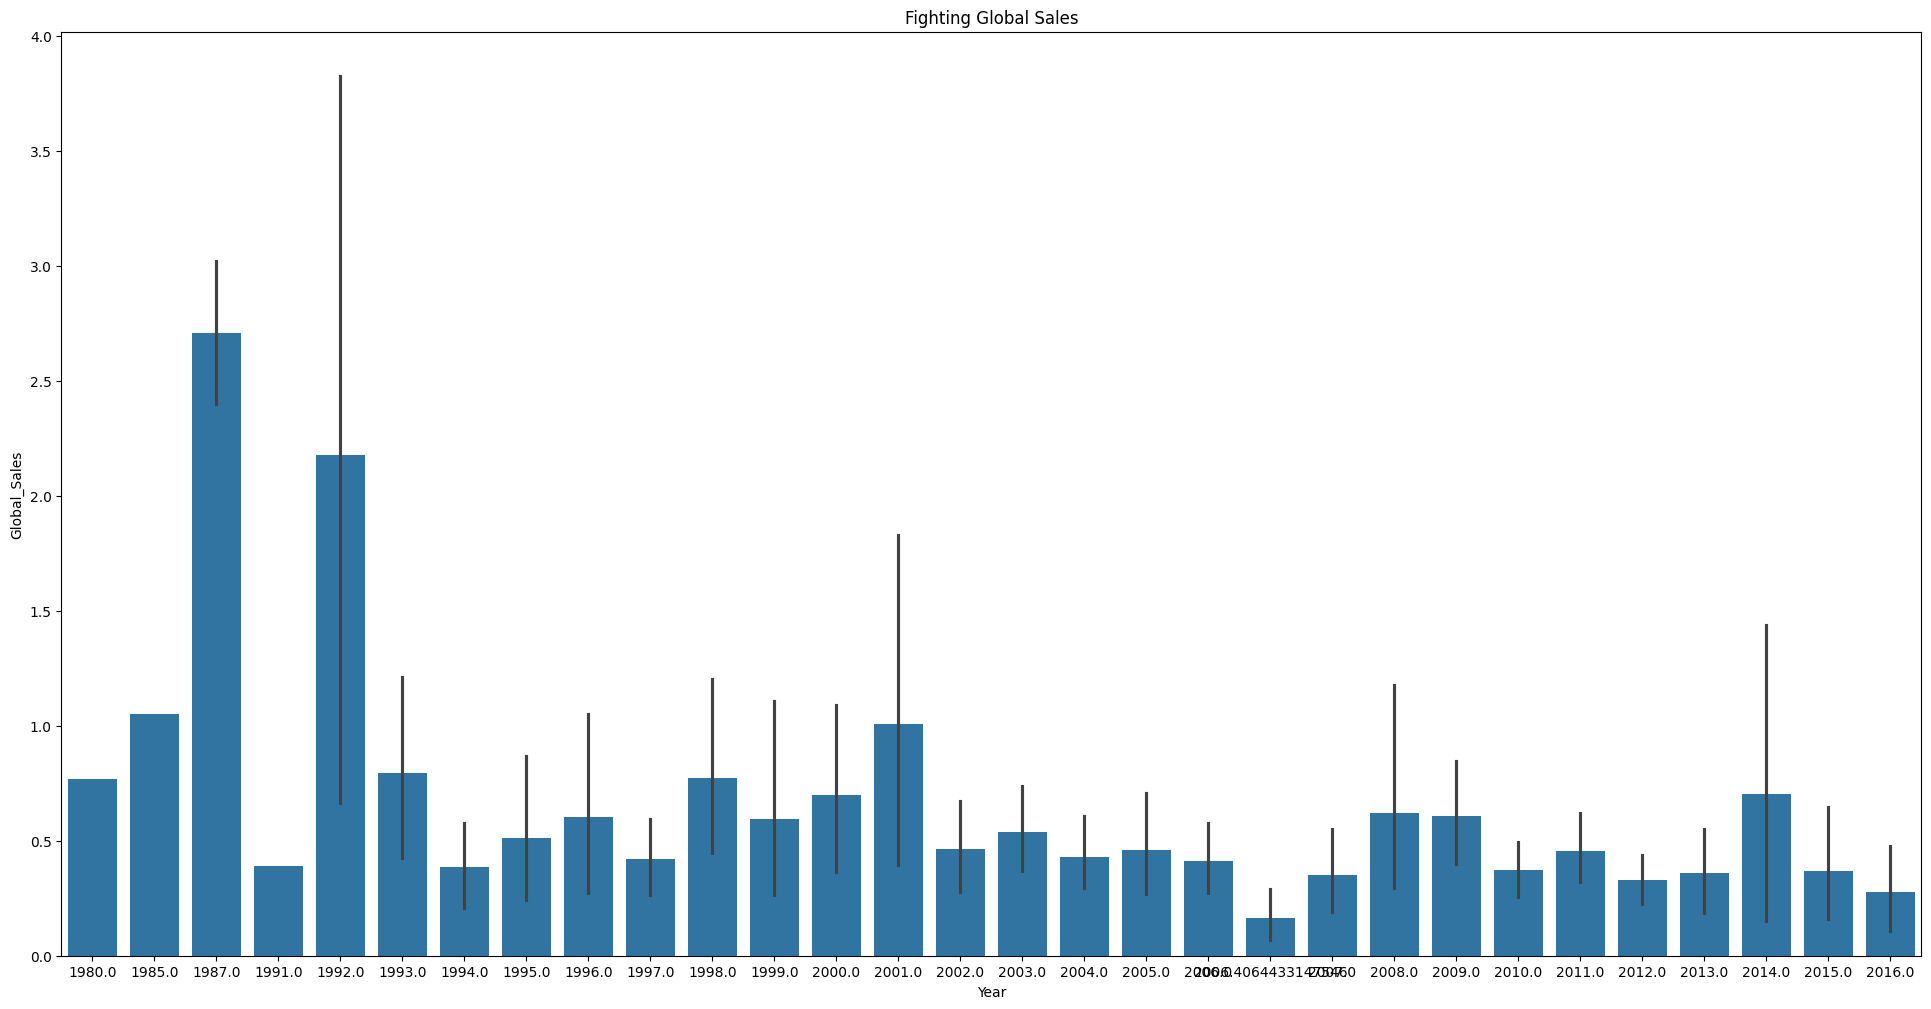

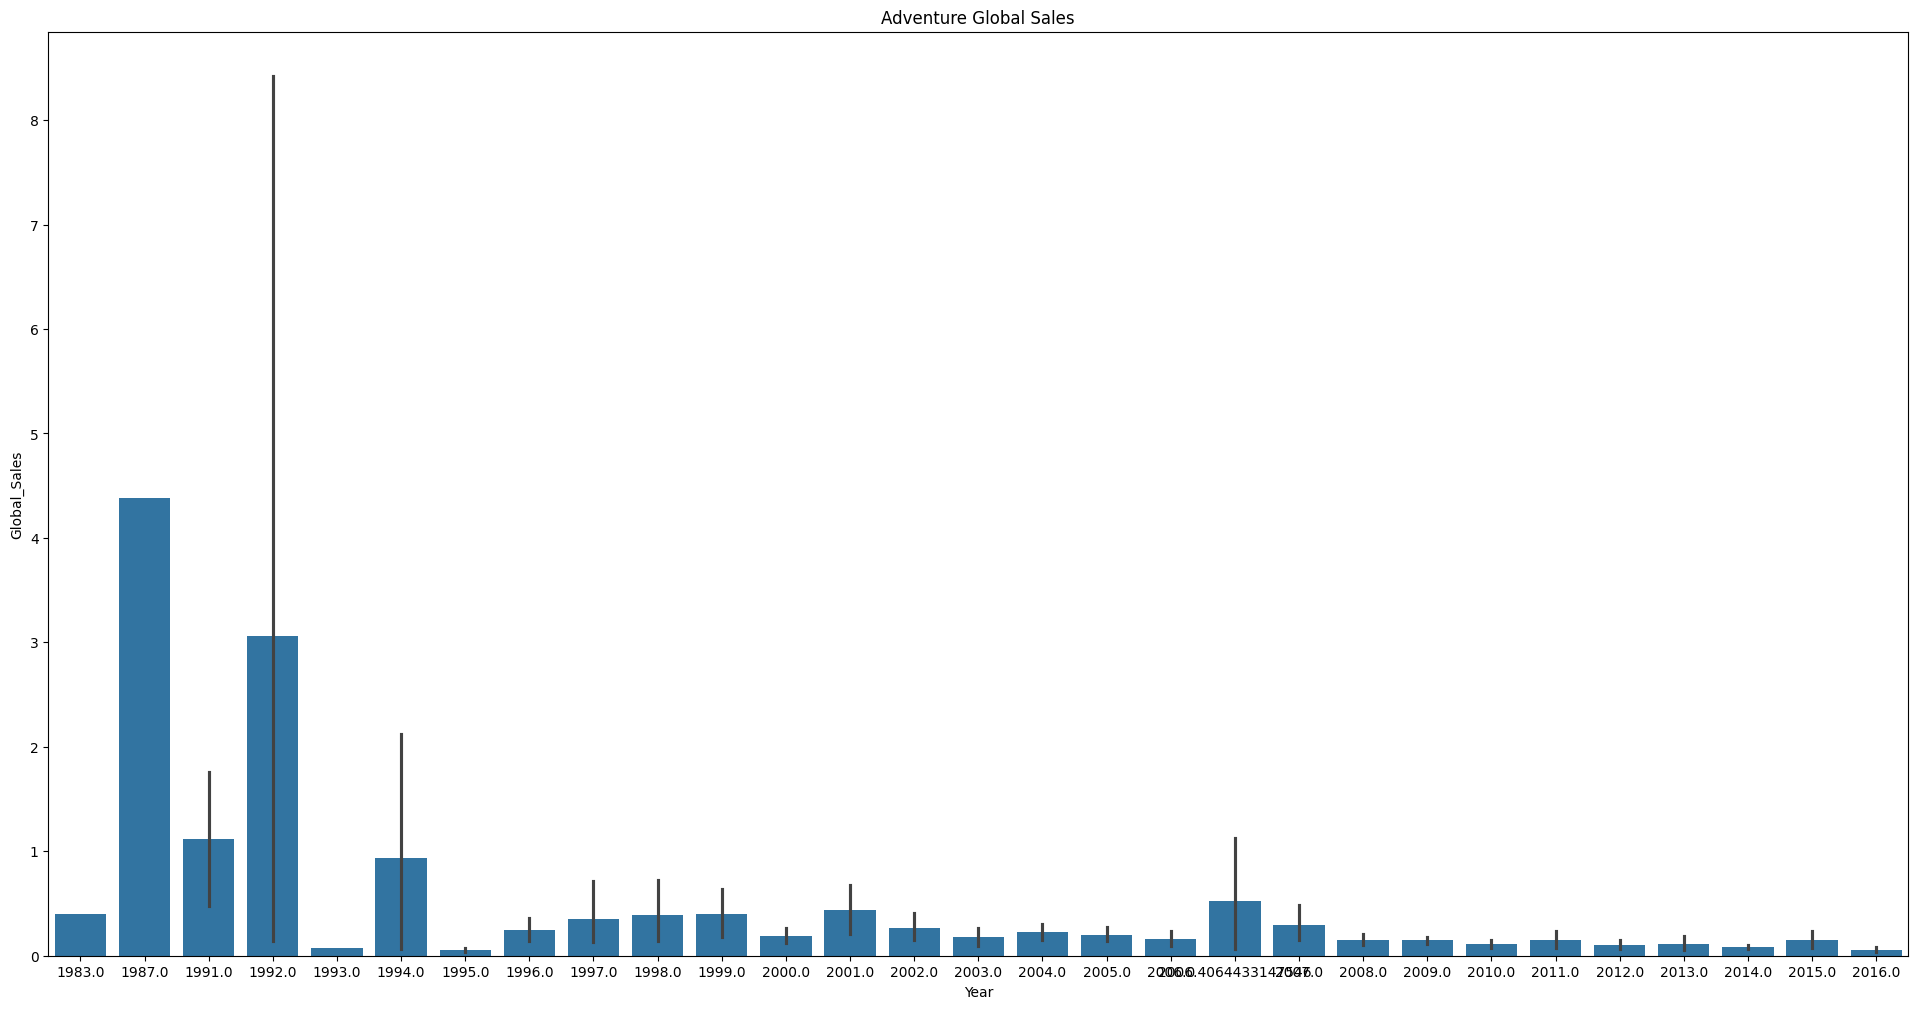

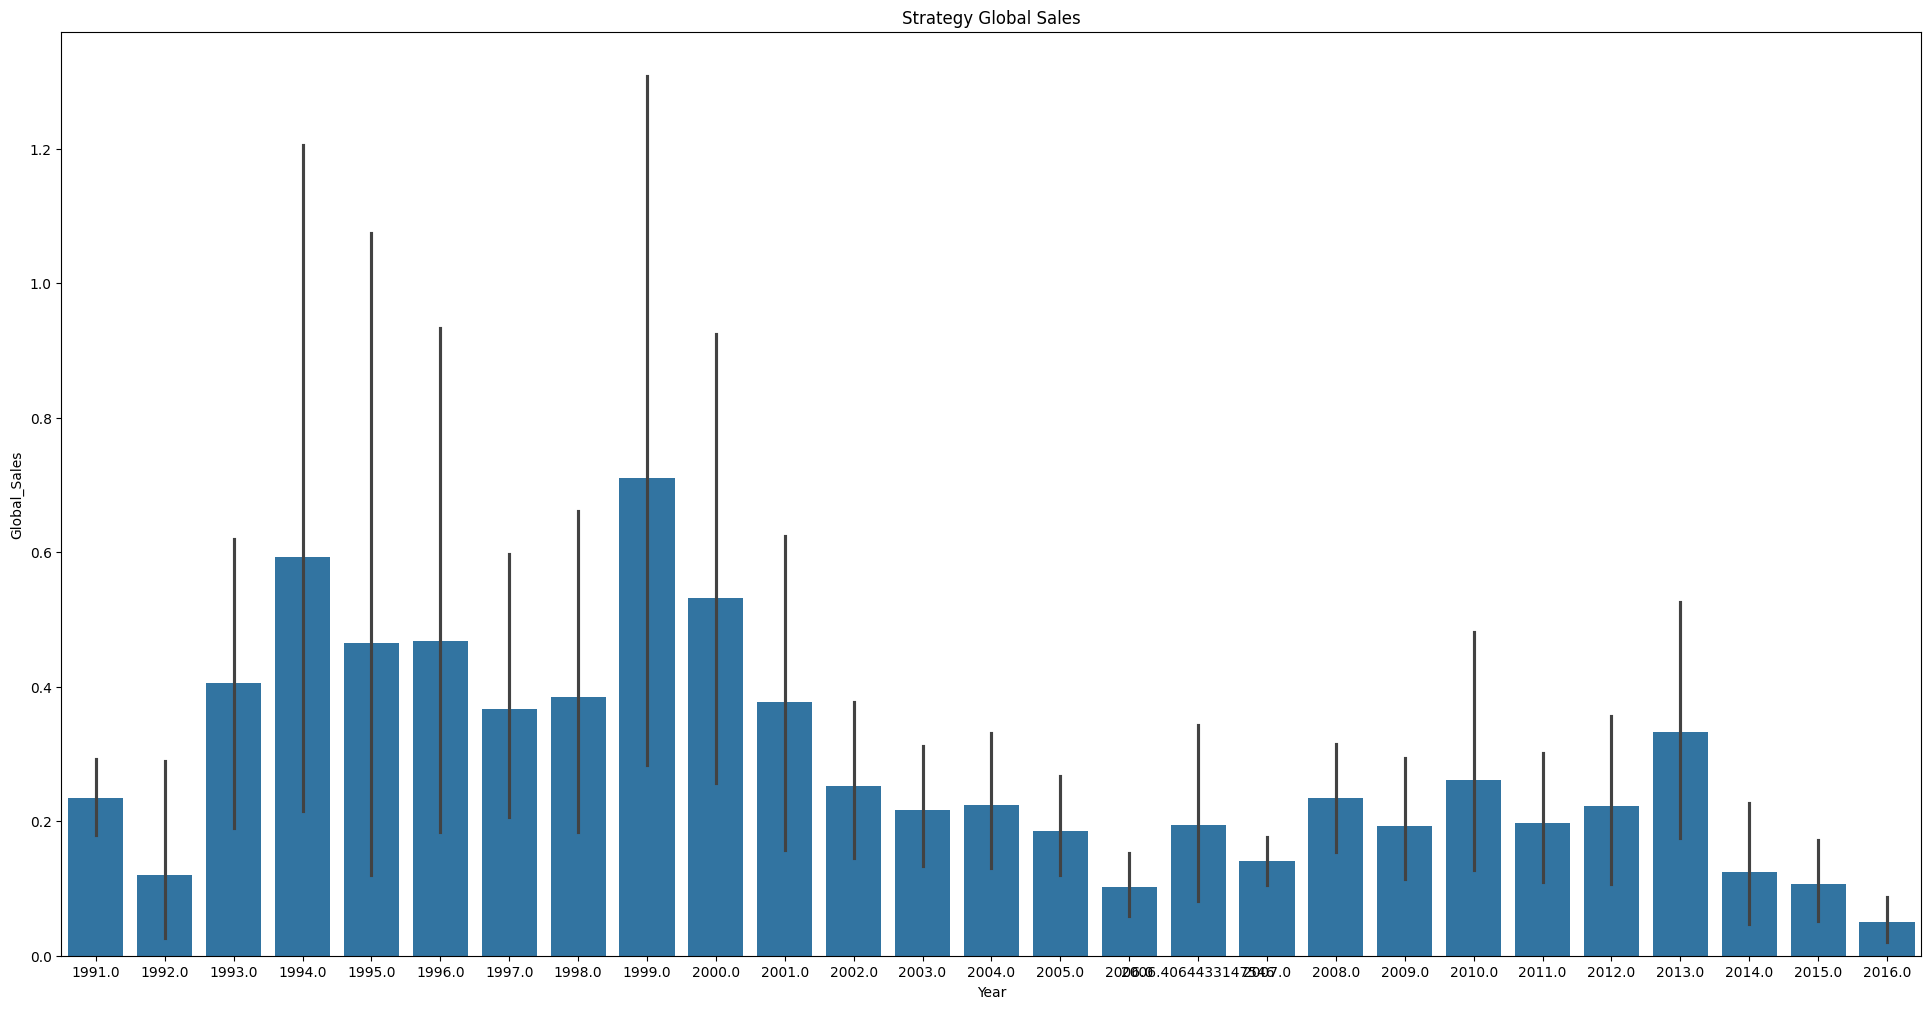

In [25]:
genres = videogame_df["Genre"].unique()
for g in genres:
    #print(g)
    plt.figure(figsize = (24, 12))
    plt.title(g+" Global Sales")
    shList = videogame_df.loc[videogame_df["Genre"] == g]
    sns.barplot(data = shList, x = "Year", y = "Global_Sales")